In [1]:
import math
import numpy as np
from pyoptools.all import *

### Sistema

In [2]:
#n_mirror= ? TODO

mobile_mirr = RoundMirror(radius= 25.4, thickness = 0.06, reflectivity = 0.99)  #specchio mobile TODO (DA CAMBIARE CON IL MODELLO MUJOCO)
ccd=CCD(size=(10,10), transparent=False)            #rivelatore della luce

# DEFINIZIONE DEL SISTEMA DI BASE SENZA FUNZIONAMENTO

In [3]:
laser_mirror_d = 200            #distanze tra laser e centro
mirror_bs_d = 200

S=System(complist=[(mobile_mirr, (0, 0, laser_mirror_d), (0, math.radians(45), 0)),
                   (ccd, (-laser_mirror_d-40, 0, laser_mirror_d), (0, math.radians(90), 0))], n=1)

# Come funziona system:
#         System(lista oggetti = ((nome oggetto , (posizione), (orientamento/rotazione)),(altri oggetti)), n=numero di raggi emessi)

In [4]:
r_color = 'violet'
#Sistema con 5 raggi
    # R=[Ray((0, 0, 0), (0, 0, 1), draw_color=r_color), 
    #     Ray((10, 0, 0), (0, 0, 1), draw_color=r_color), 
    #     Ray((-10, 0, 0), (0, 0, 1), draw_color=r_color), 
    #     Ray((0, 10, 0), (0, 0, 1), draw_color=r_color), 
    #     Ray((0, -10, 0), (0, 0, 1), draw_color=r_color),]    

#Sistema con 1 raggio

R=Ray((0, 0, 0), (0, 0, 1), draw_color=r_color)

# Come funziona Raggi , per ogni raggio seguire la sintassi:
#    R=Ray(pos=(x,y,z),dir=(ux,uy,uz),intensity=I,wavelength=lambda)

S.ray_add(R)
S.propagate()

In [5]:
Plot3D(S, 
       #center=(mirror_bs_d, 0, laser_mirror_d), 
       size=(600,400))

Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

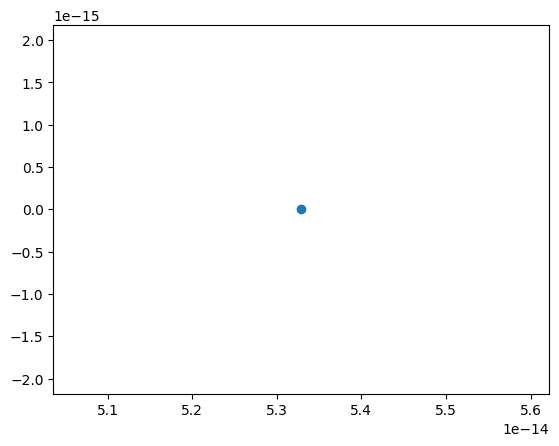

In [6]:
spot_diagram(ccd)       #plotta cosa vede il diagramma
S.reset()


In [7]:
#TODO      Prendere cosa fa nel spot_diagram [156] e 
#           prendere un fascio cosi sa fare il tracking e 
#           cercare di rimandarlo a zero asap -> 1 fascio oppure
#            2 pero con il beamsplitter (stesso fascio pero che si
#            separano nel beamsplitter da mettere cosi uno riduce il rumore
#            l altro dice la posizione per ridurlo)
#          
#
# 
#           Un idea sarebbe che su questo codice si definisce
#            una funzione che genera il sistema e ha delle funzioni che
#            creano il sistema e ne tirano fuori il grafico e nel tempo, center=(mirror_bs_d, 0, laser_mirror_d)

#            SISTEMARE ASSI RIVEDENDO IL MODELLO MUJOCO PERCHE IL SISTEMA SPARA IL LASER DA SOTTO E RIVELA DA SOPRA
#            E CE SOLO 1 RAGGIO

# Sistema con lo specchio in movimento

In [8]:
import numpy as np
import matplotlib.pyplot as plt

laser_mirror_d = 200
mirror_bs_d = 200


def plot_optical_path(m_tx, m_ty, m_dx, m_dy):     
    #   variabili (rotazione x ,rotazione y, spostamento x, spostamento y)
    S=System(complist=[(mobile_mirr, (0+m_dx, 0+m_dy, laser_mirror_d), (0+m_tx, math.radians(45)+m_ty, 0)),
                   (ccd, (-laser_mirror_d-40, 0, laser_mirror_d), (0, math.radians(90), 0))], n=1)

    #S.clear_ray_list()
    S.ray_add(R)

    #S.update_ids()
    
    S.propagate()

    a= ccd.get_optical_path_data()
    S.reset()
    return a
    #return ccd_straight.hit_list[0], ccd_refl.hit_list[0]


# Test
m = 0.00
path = plot_optical_path(m, m, m, m)
S.reset()
#print("Path: ",path)

# ([6.637536376482313e-14], [0.0], [453.88618]) ([3.915049861451714e-14], [0.0], [553.88618])

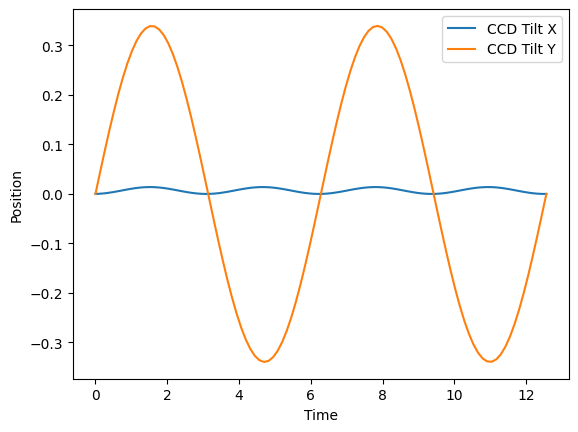

In [9]:

t = np.linspace(0, 4*np.pi, 100)
m_tx_values = np.sin(t)*0.001
m_ty_values = np.sin(t+0.1)
ccd_positions = []


for i in range(len(t)):
    path = plot_optical_path(m_tx_values[i], 0, 0, m_ty_values[i]*10)
    #print(tran_path)
    ccd_positions.append(path)

ccd_positions = np.array(ccd_positions)

plt.figure()
plt.plot(t, ccd_positions[:, 0], label='CCD Tilt X')
plt.plot(t, ccd_positions[:, 1], label='CCD Tilt Y')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

# Theory of matrices(follows "Theory_Optical_Lever")



In KAGRA, optical levers are used for measuring the angular displacements (tilt) pitch P and yaw Y of the main optics.

*The incidence angle α on the vertical plane is non-zero while that on the horizontal
plane is designed to be zero.*(<span style="color:yellow;font-weight:bold">!!</span>)


Since the angle of incidence on the vertical plane is non-zero, a longitudinal
shift of the optic will also cause the beam to be displaced in the same direction as caused by pitch of the optic, making the optic’s longitudinal displacement also sensible.

The sensor gives angular displacement of
the optic thereby helping the restoration of a coarse alignment after maintenance or lock-loss




<img src="img/mirror_angles.png" width="400" />

The optical lever setup consists of superluminescent light-emitting diode (SLED), a collimator/focuser, the optic
itself, a steering mirror, a 50/50 beamsplitter, a convex lens, another folding mirror, and two quadrant photode-
tectors (QPD).

The QPDs are light beam position sensors each consist of four photodiodes placed on
different quadrants. The horizontal and vertical displacements of the light beam at the QPD plane can be derived
from the amount of light that is received by each photodiode. We refer the one that is part of the actual angular sensing OL “Tilt-sensing QPD”
and the other “Length-sensing QPD” under this context

The light source and the collimator/focuser are placed on
an optical table outside the vacuum chamber of the suspended optic. The beam begins from a position below the
optic and travels at an angle pointing upward. The beam then enters the vacuum chamber via a lower-viewport.
After reflecting off the optic, the beam reaches a steering mirror located at the edge of another optical table which
is placed at a position outside the chamber and higher than the optic. The beam path and the optic axis forms
an incidence angle α (typically around 37◦). The steering mirror redirects the beam to follow a horizontal path
parallel to the optical table. The beam will first meet a beamsplitter which will split the beam into two beams. One
beam will go straightforwardly to the tilt-sensing QPD, while the other will reach the length-sensing QPD after
going through a convex lens with focal length of f (typically 300 mm). And, not so importantly, the purpose of the
folding mirror is simply folding the beam path such that all components can fit onto a small optical table.




<img src="img/optical_setup.png" width="400" />

In [10]:
#Variables
#TODO sistemare commenti, aggiungere altri parametri e i valori!
#Important parameters from measurements
rl=1 
rp=1
ry=1
thetatilt=1
thetalen=1
alpha=1         #Laser incidence angle
beta=1
deltaY=1
deltaP=1

#Other parameters
f=12
d=(rl*f)/(rl-f)

#Variables
xtilt=1
ytilt=1
xlen=1
ylen=1          
L=1             #Mirror displacement from optical plane 
P=1             #Pitch (beccheggio)
Y=1             #Yaw (imbardata)


<img src="img/varibales_image.png" width="500" />

## Without Cross-Coupling


If the components are aligned perfectly(!!), the relationship between the the optical lever readouts *xtilt*, *ytilt*, *xlen* and *ylen*, and the optic’s displacement *L*, *P* and *Y* can be easily deduced geometrically.

(a) and (b) side view, (c) top view.


The longitudinal displacement *L* of the optic caused the incidence beam travel an
additional distance of *L/cos α*. Reflected beam compared to the orignal one is shifted by *2Lsin α*.

The angular displacement pitch *P* of the optic redirects the reflected beam to travel at an angle *2P*, that lies on the vertical plane, from the original beam path and causes a beam displacement of *2rpP* in the same direction as (a) at distance *rp* away from the optic.


The yaw angular displacement of the optic caused the reflected beam to be deflected at an angle of *2Y* on the horizontal plane relative to the original reflection path and causes a horizontal beam displacement of *2ry Y* at distance *ry* away from the optic.(*rp* and *ry* are referred to the lever arms which amplify the pitch and yaw angular displacements, are not independent to each other by is related by the angle of incidences *α* by *ry = rp cos α*.)



So the horizontal beamspot displacement *xtilt* and the vertical beamspot displacement *ytilt* (of photodiode watch figure 1) at the tilt QPD plane relate
to the optic’s displacement (*L, P, Y*):

$$
\begin{cases}
ytilt = 2 r_p P + 2 L \sin\alpha \\
xtilt = 2 r_y Y \\
\end{cases}
$$



Length-sensing QPD, let *rl* be the distance between the optic and the convex lens (path segments 1-2-4 in Fig. 2) and *d* be the distance between the convex lens (path segments 5-6).
From the ray transfer matrix, the beam spot vertical displacement *ylen* and the angle between the beam and optical lever axis *γ*
(Following the matrix ABC rules for optics):

$$

\begin{pmatrix} y_{len} \\  γ      \end{pmatrix} =
\begin{pmatrix} 1 & d \\ 0 & 1     \end{pmatrix} 
\begin{pmatrix} 1 & 0 \\ -1/f & 1  \end{pmatrix} 
\begin{pmatrix} 1 & r_l \\ 0 & 1   \end{pmatrix} 
\begin{pmatrix} 2L\sin\alpha \\ 2P \end{pmatrix}

$$

Resolving:

$$

y_{len}= (1-\frac{d}{f})(2\sin\alpha)L + 2[(1-\frac{d}{f})r_L + d]P

$$ 



NB:
Placing the length-sensing QPD exactly at the image plane $d=\frac{r_L f}{r_L - f}$ then coefficent P is set to zero and $(1-\frac{d}{f})r_L + d=0$ ($y_{len}$) is only sensitive to L but not P):



$$

y_{len}= (1-\frac{d}{f})(2\sin\alpha)L

$$ 





In [11]:
#Code without Coupling correlations

ytilt=2*rp*P+2*L*math.sin(alpha)
xtilt=2*ry*Y
ylen=(1-(d/f))*(2*math.sin(alpha))*L


NB: In ideal case, xtilt is assumed to be only sensitive to yaw, ytilt is assumed to
be generally sensitive to pitch, while ylen is assumed to be a pure measurement of length.

## With Cross-Coupling

The alignment and the measurements are not flawless and all degrees of freedom will be cross-coupled to each other.
Pitch and yaw will be cross-coupled and will be seen in both tilt-sensing QPD readouts *xtilt* and *ytilt*. Also longitudinal to tilt coupling is caused
by a non-zero angle of incidence and will generally make *xtilt* and *ytilt* also a function of the optic’s longitudinal displacement.

The length-sensing QPD will also measure some fraction pitch and yaw motion because
the optical lever beam is not centered at the optic or due to misplacement of the length-sensing QPD

<img src="img/CrossCorrelation.png" width="500" />

( NB: The image rappresents how laser point moves if there is a pitch or yaw, and how can be cancelled the cross-coupling.)


Yaw to pitch and pitch to yaw cross-coupling could be introduced by a rotation frame of reference defined by pitch and yaw at the QPD plane (tilt frame) and the tilt-sensing QPD’s frame of reference.


The tilt frame of reference refers to the orthogonal axes (shown in red) that align with the beamspot displacement when the optic tilts in pure pitch and yaw respectively.
This misalignment can be introduced by a misaligned
steering mirror which rotates the plane of incidence of the optical lever.
In addition, the QPD itself might also be tilted w.r.t the horizontal due to design tolerances or other factors.


Therefore, both *xtilt* and *ytilt* of the tilt QPD
readouts will measure a mixture of pitch and yaw. 
Mathematically saying, the R.H.S of the *xtilt* and *ytilt* froms a vector *[(2rY ) Y, (2rP) P + (2 sin α) L]T* and this vector is rotated by an angle of *θtilt* which is the angle between the tilt-sensing QPD x-axis and the pure yaw axis. Applying the rotational matrix gives a new set of equations for the tilt-sensing readouts:

$$

\begin{pmatrix} x_{tilt} \\  y_{tilt}                 \end{pmatrix} =
        \bm{R}(\theta_{tilt})\cdot
\begin{pmatrix} (2r_Y)Y \\ (2r_P)P+(2\sin\alpha)L     \end{pmatrix} 

$$


with rotational matrix:

$$

\bm{R}(\theta)= \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{pmatrix}

$$




If the optic displaces in longitudinal direction, the beamspot displacement at the length-sensing QPD plane does not necessarily align to *ylen*:


$$

\begin{pmatrix} x_{len} \\  y_{len}                 \end{pmatrix} =
        \bm{R}(\theta_{len})\cdot
\begin{pmatrix} 0 \\ (\frac{-2f \sin\alpha}{r_L - f})L     \end{pmatrix} 

$$


There will inevitably be a angle of incidence on the horizontal plane. This will cause the reflection plane to be misaligned with the incidence plane and create
length to yaw coupling like the way pitch readout is coupled to longitudinal displacement *L*.( Adding a *(2 sin β) L* horizontal shift):


$$

\begin{pmatrix} x_{tilt} \\  y_{tilt}                 \end{pmatrix} =
        \bm{R}(\theta_{tilt})\cdot
\begin{pmatrix} (2r_Y)Y + (2\sin\beta)L \\ (2r_P)P+(2\sin\alpha)L     \end{pmatrix} 

$$


Also should be modified:


$$

\begin{pmatrix} x_{len} \\  y_{len}                 \end{pmatrix} =
        \bm{R}(\theta_{len})\cdot
\begin{pmatrix}  (\frac{-2f \sin\beta}{r_L - f})L \\ (\frac{-2f \sin\alpha}{r_L - f})L     \end{pmatrix} 

$$


NB!!:
Nevertheless, tilt to length coupling can arise from an off-centered optical lever beam. The real displacement of the beamspot *Lbeam* at the suspended optic:


$$

\begin{pmatrix} x_{tilt} \\  y_{tilt}                 \end{pmatrix} =
        \bm{R}(\theta_{tilt})\cdot
\begin{pmatrix} (2r_Y)Y + (2\sin\beta)L_{beam} \\ (2r_P)P+(2\sin\alpha)L_{beam}     \end{pmatrix} 

$$


Also should be modified:


$$

\begin{pmatrix} x_{len} \\  y_{len}                 \end{pmatrix} =
        \bm{R}(\theta_{len})\cdot
\begin{pmatrix}  \left(\frac{-2f \sin\beta}{r_L - f}\right)L_{beam} \\ \left(\frac{-2f \sin\alpha}{r_L - f}\right)L_{beam}     \end{pmatrix} 

$$

Normally, L and Lbeam are synchronized. However, if the optical lever beamspot is offset from the optical axis of the optic, the beamspot displacement Lbeam will not be the same as the longitudinal displacement of the optic *L* but will gain additional offsets of *δY* and *δP*:

$$

L_{beam}=L+\delta_{P}P+\delta_{Y}Y

$$

where *δY* and *δP* are the beamspot’s horizontal and vertical offsets at the suspended optic.




Combining all equations we create the equation relating the QPDs readout to the optic’s displacement:


$$

\begin{pmatrix}
    \cos\theta_{tilt} & \sin\theta_{tilt} & 0 & 0 \\
    -\sin\theta_{tilt} & \cos\theta_{tilt} & 0 & 0 \\
    0 & 0 & -\sin\theta_{tilt} & \cos\theta_{tilt}
\end{pmatrix}
\begin{pmatrix} x_{tilt}\\ y_{tilt} \\ x_{len} \\ y_{len}\end{pmatrix} =

\begin{pmatrix} 
    2\sin\beta & 2\delta_{P}\sin\beta & 2r_Y+2\delta_{Y}\sin\beta \\
    2\sin\alpha & 2r_P+2\delta_{P}\sin\alpha & 2\delta_{Y}\sin\alpha \\
    \left(\frac{-2f \sin\alpha}{r_L - f}\right)  & \left(\frac{-2\delta_{P}f \sin\alpha}{r_L - f}\right)  & \left(\frac{-2\delta_{Y}f \sin\alpha}{r_L - f}\right)(
\end{pmatrix}
\begin{pmatrix} L\\ P \\ Y\end{pmatrix}

$$

Besides the off-centered beam, tilt to longitudinal could also be caused by misplacement of the length-sensing QPD. The length-sensing QPD should measure a fraction of the tilt motion
regardless of the position of the beamspot at the main optic.


In [12]:
#Reset variables

#Important parameters from measurements
rl=1 
rp=1
ry=1
thetatilt=1
thetalen=1
alpha=1         #Laser incidence angle
beta=1
deltaY=1
deltaP=1

#Other parameters
f=12
d=(rl*f)/(rl-f)

#Variables
xtilt=1
ytilt=2
xlen=1
ylen=1          
L=1             #Mirror displacement from optical plane 
P=1             #Pitch (beccheggio)
Y=1             #Yaw (imbardata)

In [13]:


#Tilting without horizontal plane incidence (β=0)
Rtilt = np.array([[math.cos(thetatilt), -math.sin(thetatilt)],
              [math.sin(thetatilt),  math.cos(thetatilt)]])

vector_tilt = np.array([2 * ry * Y,
                        2 * rp * P + 2 * L * math.sin(alpha)])
tilt = np.matmul(Rtilt, vector_tilt)

xtilt=tilt[0]
ytilt=tilt[1]


#Lengthening without horizontal plane incidence (β=0)
Rlength = np.array([[math.cos(thetalen), -math.sin(thetalen)],
              [math.sin(thetalen),  math.cos(thetalen)]])
vector_len = np.array([0, (-2*f*math.sin(alpha)/ (rl - f ))*L])
len = np.matmul(Rlength, vector_len)

xlen=len[0]
ylen=len[1]

#----------------------------------------------------------------------------------------
#(β>0):

#Tilting with horizontal plane incidence (Same rotation matrix)
vector_tilt = np.array([2 * ry * Y + 2 * math.sin(beta) * L,
                        2 * rp * P + 2 * L * math.sin(alpha)])
tilt = np.matmul(Rtilt, vector_tilt)

xtilt=tilt[0]
ytilt=tilt[1]


#Lengthening with horizontal plane incidence (Same rotation matrix)
vector_len = np.array([(-2*f*math.sin(beta)/ (rl - f ))*L, (-2*f*math.sin(alpha)/ (rl - f ))*L])
len = np.matmul(Rlength, vector_len)

xlen=len[0]
ylen=len[1]


#----------------------------------------------------------------------------------------
#Off-centered beam (δP, δY ≠ 0):


Lbeam=L+deltaP*P+deltaY*Y

#Tilting with horizontal plane incidence (Same rotation matrix)
vector_tilt = np.array([2 * ry * Y + 2 * math.sin(beta) * Lbeam,
                        2 * rp * P + 2 * Lbeam * math.sin(alpha)])
tilt = np.matmul(Rtilt, vector_tilt)

xtilt=tilt[0]
ytilt=tilt[1]


#Lengthening with horizontal plane incidence (Same rotation matrix)
vector_len = np.array([(-2*f*math.sin(beta)/ (rl - f ))*Lbeam, (-2*f*math.sin(alpha)/ (rl - f ))*Lbeam])
len = np.matmul(Rlength, vector_len)

xlen=len[0]
ylen=len[1]



## Diagonalization


For the optical lengths* rL*, *rP* and *rY* , and the incidence angle on the vertical plane *α*, they are more or less fixed
by the design. 


As for the rotational angles *θtilt* and *θlen*, beamspot offsets *δY* and *δP*, and the angle of incidence *β*, it is not easy
to directly measure them and will require inferring the coupling ratios in the displacement amplitude spectrum in
order to indirectly obtain them.
The idea of using amplitude spectrum utilizes the fact that longitudinal, pitch and yaw modes are mostly distinguishable in frequency space.

From the SUMCON model, a pure pitch (*P*) mode can be identified at around 0.85 Hz, whereas two pure yaw (*Y*) modes can be found
at around 1 Hz and 1.38 Hz.
Although a pure longituidal(*L*) mode does not exist, the main pendulum modes at around 0.65 Hz involving both *L* and *P* serves as a good reference for identifying the longitudinal motion.


Before measurements are done, the length sensing QPD has to be placed exactly at 
$d=\frac{r_L f}{r_L - f}$  from the convex lens in order for the equations to be valid.
Since *rL* is directly measurable, the QPD can be placed approximately at the right position.



$\bm{NB}$:
The position of the length sensing QPD was tuned such that it is coupled to minimum tilt. This is done with an iterative process.

$\bm{1}$-Excite the pure pitch mode at 0.85 Hz and measure the length sensing QPD readouts. 

$\bm{2}$-Then the position of the QPD was adjusted with a fine transnational stage until the a minimal 0.85 Hz signal is reached. 

This does not guarantee that the QPD is placed accurately at the position but a reasonable good estimation assuming minimal coupling due to the OL beam offset *δP*.
In doing so, the coupling from pitch is minimized and the L signal
is maximized.


The first two parameters that can be obtained from measurements are *θlen* and *θtilt*.
They only depend on the ratios between the measured vertical and horizontal readouts from the QPDs but not the actual longitudinal, pitch or yaw displacement.

To obtain *θlen*, the 0.65 Hz longitudinal mode was first
stimulated. Then, the horizontal and vertical beamspot displacement at the length-sensing QPD plane at that
frequency, *xlen*(f=0.65 Hz) and *ylen*(f=0.65 Hz), can be used to calculate the rotational angle *θlen* as follows (assuming pitch
and yaw motion are very small compared to longitudinal motion and $\beta$ small [Type-B suspensions]):

$$

\theta_{len}=\arctan\left(-\frac{x_{len}}{y_{len}}\right)\bigg|_{f=0.65Hz}

$$


By applying this angle *θlen*, the length-sensing QPD frame can be aligned very close to the desired frame and the equation:



$$

L \approx -\frac{r_L -f}{2f\sin\alpha}\begin{pmatrix}-\sin\theta_{len} & \cos\theta_{len}\end{pmatrix}\begin{pmatrix} x_{len} \\ y_{len}\end{pmatrix}

$$

$\bold{NB}$:  very good approximated of the longitudinal displacement of the optic, at least at the longitudinal resonance frequency. This can be cross-verified by offsetting the longitudinal displacement at the IP stage and comparing the two displacements measured by the IP LVDTs.


same approach can be used for obtaining *θtilt*. Exciting the pitch mode at 0.85 Hz or the yaw modes at 1 Hz and 1.38 Hz will simplify equations:



if *xtilt* and *ytilt* are evaluated at the pitch resonance frequency (0.85 Hz) while the pitch mode was excited:
$$

\begin{pmatrix} x_{tilt} \\ y_{tilt}\end{pmatrix} = \bm{R}(\theta_{tilt})\cdot \begin{pmatrix} 0 \\ \left( 2r_P P\right)\end{pmatrix}

$$

if xtilt and ytilt are evaluated at the pitch resonance frequency (1 Hz, 1.38 Hz) while the pitch mode was excited:

$$

\begin{pmatrix} x_{tilt} \\ y_{tilt}\end{pmatrix} = \bm{R}(\theta_{tilt})\cdot \begin{pmatrix} \left( 2r_Y Y\right) \\ 0\end{pmatrix}

$$


So the $\theta_{tilt}$ can be calculated:

$$

\theta_{tilt}=\arctan\left(-\frac{x_{tilt}}{y_{tilt}}\right)\bigg|_{f=0.85Hz}

$$

or


$$

\theta_{tilt}=\arctan\left(-\frac{y_{tilt}}{x_{tilt}}\right)\bigg|_{f=1Hz or 1.38Hz}

$$

$\bm{NB}$:In all cases, the obtained *θtilts* should be very similar, if not the same.


One of the reasons why *θtilt* can be different is because the optical lever beamspot displacements at the optic, *δP* and *δY* , were
assumed to be zero, but, in fact, there could be non-zero but very small.
*δP* and *δY* in Lbeam couple
to *(2rP) P* more strongly compared to *(2rY ) Y* because *α* is much greater than *β* by design. (use equation witg 0.85Hz)

In any case, the coupling ratios between pitch to yaw and yaw to pitch
should be very small (typically lower than 0.01 μrad/μrad) regardless of which *θtilt* is chosen.
From here, estimation of pitch and yaw at their corresponding resonance frequencies can be done by applying *θtilt* to equation where *L* ≈0 when the optic is not excited at those frequencies in longitudinal DoF.


The rest of the parameters β, δY and δP can be obtained by applying the known
parameters.

$\bm{β}$:
For β, it can be obtained by stimulating the longitudinal mode and measuring
at the corresponding frequency. With only the longitudinal mode (0.65 Hz) excited, the first equation, at 0.65 Hz, can be simplified to obtain β.


$$

\beta= \arcsin\left( \frac{x_{tilt}\cos\theta_{tilt}+y_{tilt}\sin\theta_{tilt}}{2L}\right)\bigg|_{f=0.65Hz}

$$

$\bm{δ_Y}$  and $\bm{δ_P}$:

Can be obtained by separately excitation and measurement of yaw mode and pitch mode respectively.
When only yaw mode is excited, at the yaw resonance frequencies:

$$

\delta_{Y}= \frac{L_{beam}}{Y}\bigg|_{f=1Hz or 1.38Hz}

$$

While in the case of pitch:

$$

\delta_{P}= \frac{L_{beam}}{P}\bigg|_{f=0.85Hz}

$$


$\bm{L_{beam}}$:


To be an approximation of longitudinal displacement because *δY* and *δP* were set to zero. 
And, in fact, the left handside of the equation should be replaced by *Lbeam* so the equation is exact:

$$

L = -\frac{r_L -f}{2f\sin\alpha}\begin{pmatrix}-\sin\theta_{len} & \cos\theta_{len}\end{pmatrix}\begin{pmatrix} x_{len} \\ y_{len}\end{pmatrix}


$$


$\bm{NB}$: Meanwhile, assuming that *2rY >> 2δY sin β* and *2rP >> 2δP sin α* (2rY and *2rP* are in the order of 1m while *δY* and *δP* are typically in the order of $10^{−2}$ m or less), yaw and pitch can be estimated by:


$$

\begin{pmatrix} Y \\  P                                     \end{pmatrix} =
\begin{pmatrix} \frac{1}{2r_Y} & 0 \\ 0 & \frac{1}{2r_P}    \end{pmatrix} 
\begin{pmatrix} \cos\theta_{tilt} & \sin\theta_{tilt} \\ -\sin\theta_{tilt} & \cos\theta_{tilt}                                           \end{pmatrix} 
\begin{pmatrix} x_{tilt} \\ y_{tilt}                        \end{pmatrix}

$$


In [ ]:
#TODO SISTEMARE CONTI


#Misuring parameters:
#You need to measure at 0.65Hz the longitutinal mode (consideting yaw and pitch small)
thetalen=math.atan(-(xlen)/(ylen))      #At frequency f=0.65Hz longitudinal mode
L=-(rl-f)*(-math.sin(thetalen)*xlen+math.cos(thetalen)*ylen)/(2*f*math.sin(alpha))          #good approximation of the longitudinal displaciment of the optic


#Using equation 17 and 19 because are more accurate: (1Hz or 1.38Hz of yaw mode)

vector_yaw=np.array([0,2*ry*Y])
tilt = np.matmul(Rtilt, vector_yaw)

xtilt=tilt[0]
ytilt=tilt[1]

thetatilt=math.atan(ytilt/xtilt)        #At frequency f=1Hz or 1.38Hz yaw mode


#NB: If not possible to yaw use the equation 16 and 18 with pure pitch at 0.85Hz
#    and coupling ratios between pitch and yaw  and yaw to pitch should be very small regardless thetatilt


#Rest of parameters:

#longitudinal mode 0.65Hz from eq 10:
beta= math.asin((xtilt*math.cos(thetatilt)+ytilt*math.sin(thetatilt))/(2*L))


#The equation of L is an approximation because you should use: (for deltaP and deltaY != of zero)

Lbeam=-(rl-f)*(-math.sin(thetalen)*xlen+math.cos(thetalen)*ylen)/(2*f*math.sin(alpha))      


#for a yaw mode 1Hz or 1.38Hz from eq 12:
deltaY=Lbeam/Y

#for a pitch mode 0.85Hz from eq 11:
deltaP=Lbeam/P



#Yaw and Pitch: (IF 2ry >> 2deltaY and 2rp >> 2deltaPsin(alpha))

Rtilt2 = np.array([[math.cos(thetatilt), math.sin(thetatilt)],
              [-math.sin(thetatilt),  math.cos(thetatilt)]])

matrix_product=np.matmul(np.matmul(np.array([1/(2*ry),0],[0, 1/(2*rp)]),Rtilt2), np.array([xtilt,ytilt]))

Y=matrix_product[0]
P=matrix_product[1]



TypeError: Field elements must be 2- or 3-tuples, got '0'

## Conclusion

So, to obtain the parameters *δY* and *δP*, yaw modes and pitch modes were excited
and measured separately. Then,* Lbeam*, *P* and *Y* can be calculated. Lastly, the values can be substituted into Eqn.s to obtain the optical lever beam offset at the optic plane.
As can be seen, the normal modes provide very convenient directional reference of the suspension. Concentrating in
resonance peaks in the displacement spectrum of the QPD readout while modes are excited simplifies the gigantic
diagonalization equation (Eqn. 13) to relatively simple equations that can be applied at certain frequencies to
obtain all the parameters relating the QPD readout to the optic’s actual longitudinal displacement, pitch angular
displacement and yaw angular displacement

# Test Matrices with setup

In [ ]:
#TODO Leggi sotto
#Bisogna modificare angoli specchio ogni volta che inizio una simulazione cosi posso testare come dico sotto 

#IDEA:

1) Decide optical lengths *rl, rp ,ry*, focal lenght *f* (typically 300mm), distance from convex lens to Lenght sensig QPD *d* and the incidence angle on vertical plane $\alpha$(typically 37°)
2) Understand how to make an oscillation with frequency $\nu$ 
3) Understand what means: "From the SUMCON model a pure pitch mode can be identified at around 0.85 Hz and yaw modes at 1Hz and 1.38 Hz" -> Sono Frequenze di risonanza per avere moti puri e possiamo ricavare da simulatori.  (simulatore Piero e Nicolò senno applicando funzione  applicando forze per il moto  e si muove a frequenza di risonanza con white noice )

4) Test procedure: 1- Generate a random *xtilt, ytilt, xlen, ylen*
                   2- Let the machine calculate, with parameters, *L,Y,P*
                   3- Calculate the rotation of the mirror from equilibrium
                   4- Start to test
                   5- Let the machine to make forces to return at *L=Y=P=0=*"rest position".




Procedura calibraz-> parametri-> imposto specchio a certa angolazione e leggi cosa dice su xy e controlli se sono giusti.
(puoi ricavare barre errore)

All algorit i parametri li faccio dei parametri di sistema in gym e allena stesso agente su ambienti simili (vogliamo scalibrare parametri)



1. Fare confronto tra movimento reale e calcoli 
2. Definire parametri generale (forze che imposti e parametri modello)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------


We receive (*xtilt, ytilt, xlen, ylen*)
We can mesure (*rl,rp,ry,f,$\alpha$,d*)
We can calculate (*Y,P,L*)
We can simulate the dissipation-> Reward depance from: 
1) time to return to position -> con reward limiti forza 
2) correct return postion -> How can you say if is the correct position? (Measure *Y,P,L* and recalculate *xtilt, ytilt, xlen, ylen* before end of simulation or everytime after apply force?)
3) How to contrast previous force (not to make to much force or can breake)  -> Parametro di forza massima che blocca (della bobina) + Action box di gymn che limita forza 
4) Make condition to brake the simulation: (e.g. too much torque or force and broke the mirror, ...)-> Terminated o limiti di passi in gymn o angoli limite
5) Avoid resonances (Maybe to break if possible?) -> Dalle reward energia 

In [ ]:
#Da modello nicolo matlab "femto" oopure octopus (da citare!)

#yaw=13mHZ
#pitch=2.1HZ 4.08 HZ
#L=0.823HZ e 1.32 HZ

